In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()
print("Number of training samples:", len(X_train))
print("Number of testing samples:", len(X_test))
print("Shape of an image: " , X_train[0].shape)

Number of training samples: 60000
Number of testing samples: 10000
Shape of an image:  (28, 28)


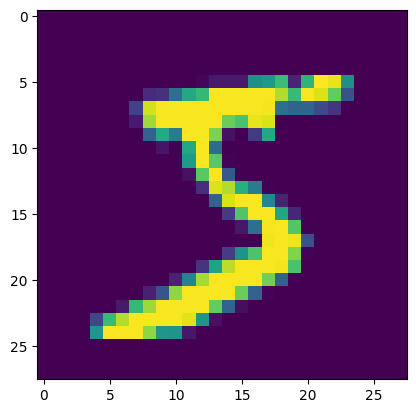

In [3]:
plt.imshow(X_train[0])

In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
cnn_model = Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9083 - loss: 0.3113 - val_accuracy: 0.9821 - val_loss: 0.0567
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9858 - loss: 0.0484 - val_accuracy: 0.9867 - val_loss: 0.0391
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9908 - loss: 0.0308 - val_accuracy: 0.9899 - val_loss: 0.0303
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9931 - loss: 0.0215 - val_accuracy: 0.9906 - val_loss: 0.0283
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9948 - loss: 0.0163 - val_accuracy: 0.9903 - val_loss: 0.0319
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9961 - loss: 0.0127 - val_accuracy: 0.9914 - val_loss: 0.0266
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9969 - loss: 0.0103 - val_accuracy: 0.9906 - val_loss: 0.0312
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9969 - loss: 0

In [6]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, Y_test)

print(f"Test accuracy: {test_accuracy * 100:.2f}%") 
print("Test loss:    ", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9867 - loss: 0.0478
Test accuracy: 99.04%
Test loss:     0.034687887877225876


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


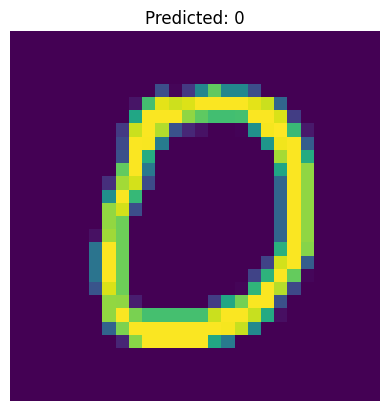

In [17]:
predictions = cnn_model.predict(X_test) 
predicted_labels = np.argmax(predictions, axis=1) 
index = 10

plt.imshow(X_test[index]) 
plt.title(f"Predicted: {predicted_labels[index]}") 
plt.axis('off') 
plt.show() 